# Airbnb Price Prediction and Insights

Introduction

Airbnb provides a platform for property owners to rent out their spaces to travelers. Pricing a
 listing effectively is critical for maximizing revenue while staying competitive in the market.
 For hosts, understanding what factors influence the price of their listings is essential.
 This project aims to build a machine learning model to predict the price of Airbnb listings
 based on various features such as property type, room type, location, amenities, and host
 characteristics. By analyzing these factors, this project will provide actionable insights to
 Airbnb hosts to optimize their listing prices.

Goal of Project 

The objective of this project is to develop a regression model that predicts the price
 of an Airbnb listing. Using features such as property type, room type, number of reviews,
 location, and amenities, the model aims to estimate the price accurately.
 The insights derived from this analysis helps Airbnb hosts understand the key drivers of
 price, enabling them to make data-driven decisions for pricing their properties. Additionally,
 the project help Airbnb refine its recommendations for pricing to improve host and guest
 satisfaction.

# Data Loding and Exploration

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load the dataset

df = pd.read_excel("Airbnb_data.xlsx")

In [7]:
# display the first few row of dataset

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [9]:
df.shape

(74111, 29)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [13]:
df.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [15]:
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


# Data cleaning, Feature engineering and Transformations

In [18]:
# filling blank rows in numarical column

df['bathrooms'].fillna( df['bathrooms'].median(), inplace= True)
df['bedrooms'].fillna(df['bedrooms'].median() , inplace=True)
df['beds'].fillna(df['beds'].median() , inplace=True)   
df['host_response_rate'].fillna(df['host_response_rate'].median() , inplace=True)  


In [20]:
#filling blacnk rows in categorical coulmns
df['neighbourhood'].fillna("Unknown" , inplace=True)
df['zipcode'].fillna("Unknown", inplace = True)
df['host_identity_verified'].fillna("f", inplace=True)
df['host_has_profile_pic'].fillna("f" , inplace=True)

In [22]:
#handling date columns

df['host_since'] = pd.to_datetime(df['host_since'],errors='coerce')
df['first_review'] = pd.to_datetime(df['first_review'],errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'],errors='coerce')

In [24]:
# droping the missing rows of host (only 188 missinig rows and hosts are not verified nor have profile pic)

df.dropna(subset= ['host_since'], inplace=True)

In [26]:
# filling review score rating by median(review no > 0) and 0 (review no = 0).

# Calculating median where review_number > 0
median_score = df.loc[df['number_of_reviews'] > 0, 'review_scores_rating'].median()

# Filling missing review_score with 0 where review_number is 0
df.loc[(df['review_scores_rating'].isna()) & (df['number_of_reviews'] == 0), 'review_scores_rating'] = 0

# Filling remaining missing review_score with median where review_number > 0
df.loc[(df['review_scores_rating'].isna()) & (df['number_of_reviews'] > 0), 'review_scores_rating'] = median_score


In [28]:
#create new features of no. of days using datetime datatype columns.

df["host_tenure"]= (pd.to_datetime("today") - df['host_since']).dt.days
df["days_since_last_review"]= (pd.to_datetime("today") - df['last_review']).dt.days

df['host_tenure'].fillna(df['host_tenure'].median(),inplace=True)
df["days_since_last_review"].fillna(df["days_since_last_review"].median(), inplace=True)

In [30]:
# Droping irrelevant columns which are less important for modeling

df=df.drop(['id' ,'thumbnail_url' , 'description' , 'name', "first_review" , "host_since" , "last_review" ],axis=1)


In [32]:
df.isnull().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
host_tenure               0
days_since_last_review    0
dtype: int64

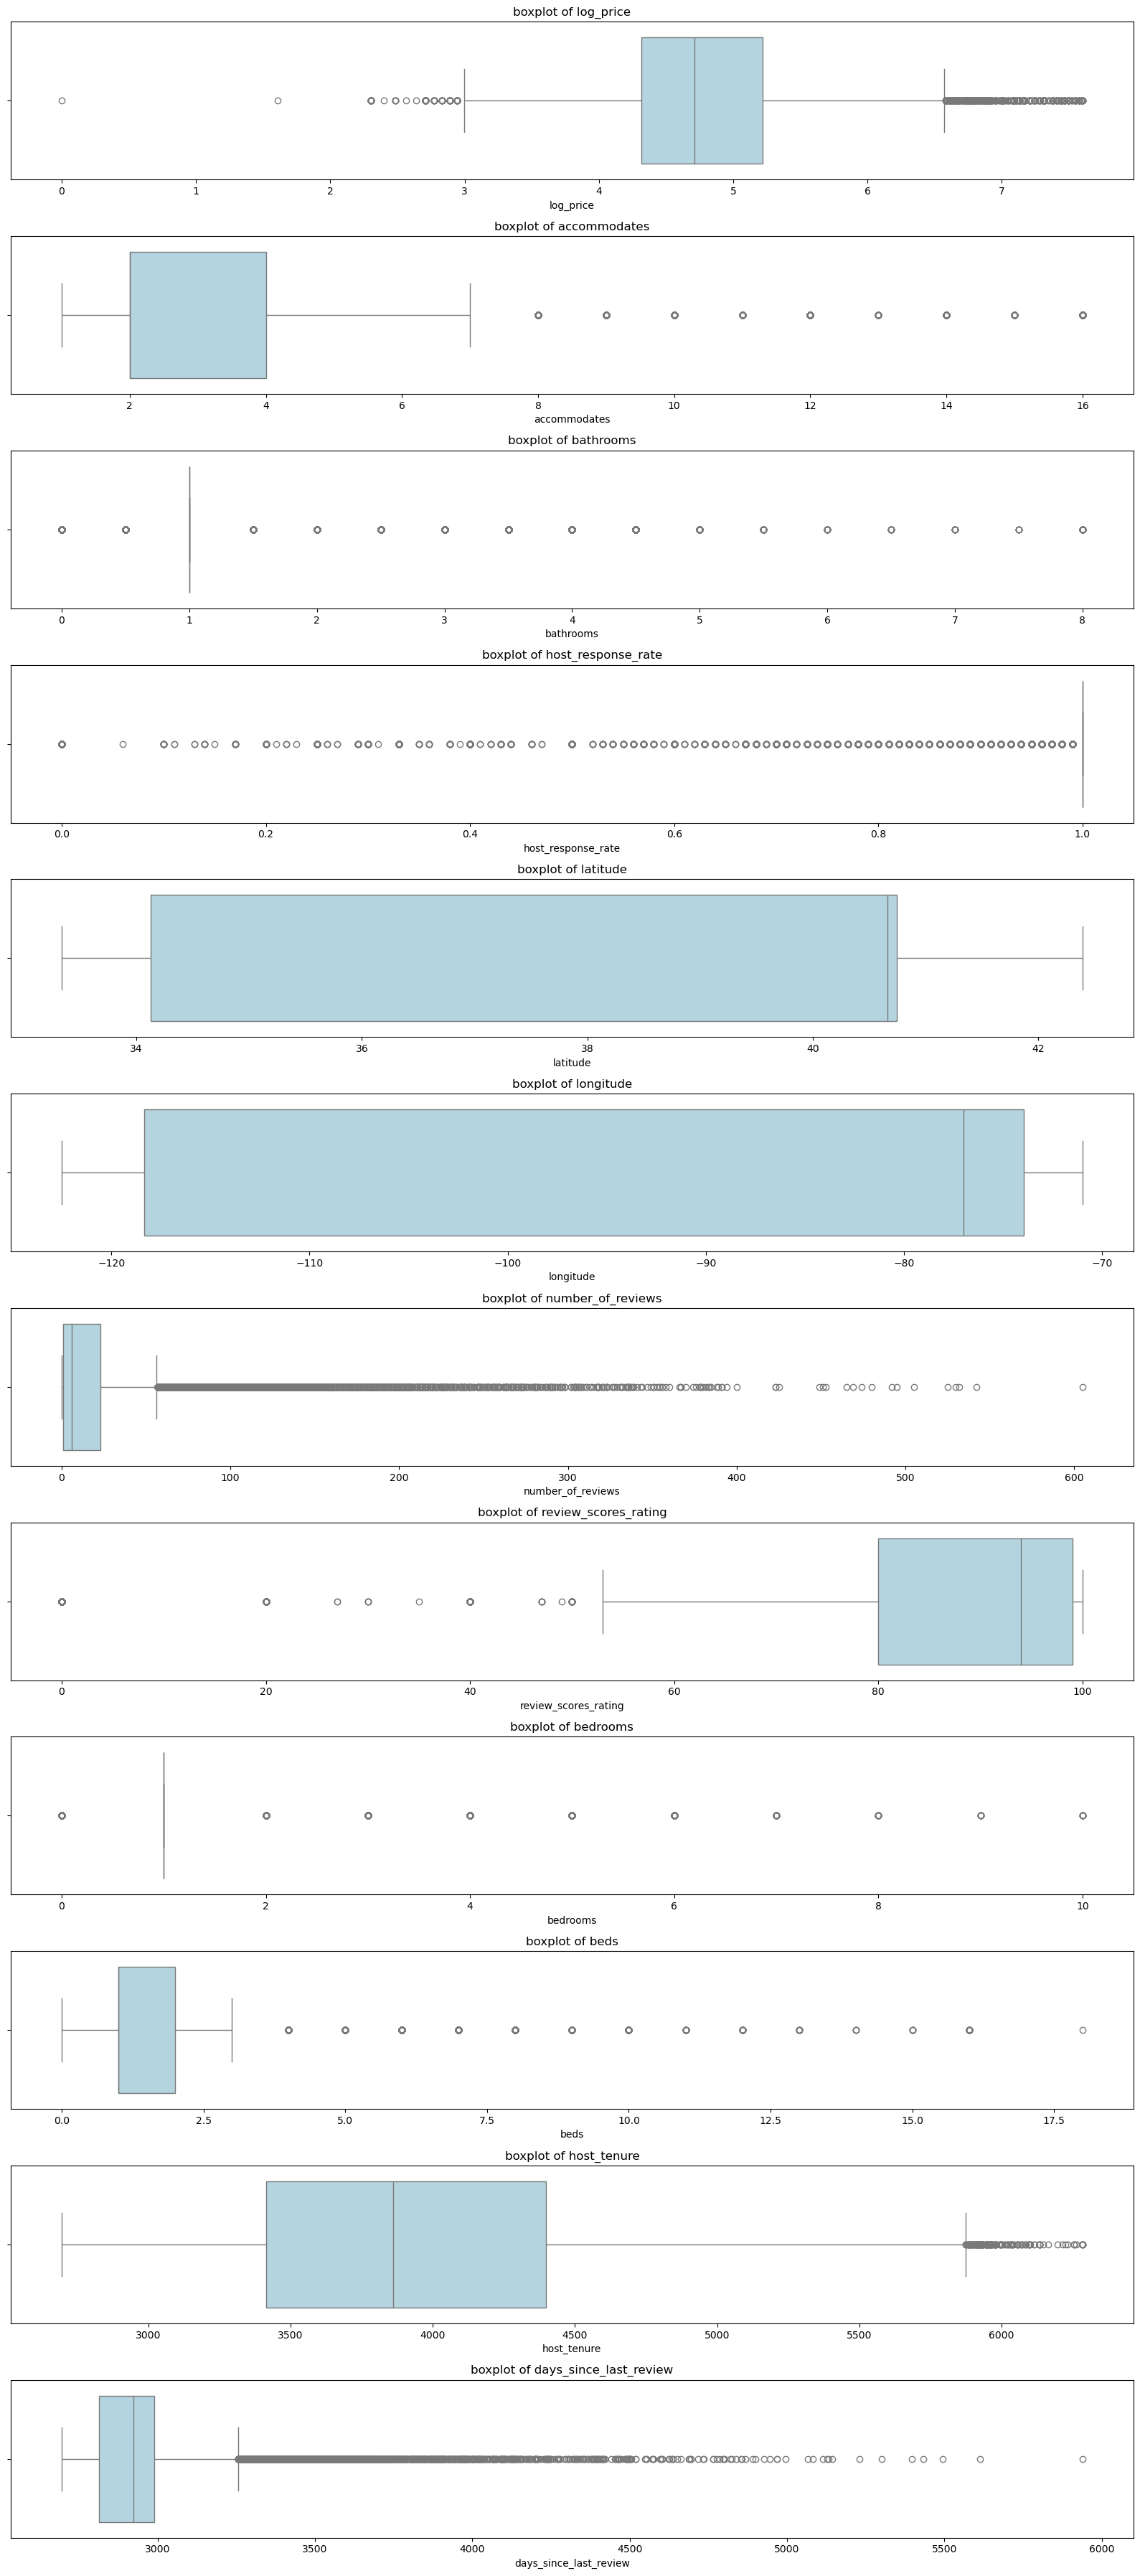

In [34]:
# Outlier detection
num_col = df.select_dtypes(include= ['int64', 'float64']).columns

plt.figure(figsize= (16,len(num_col)*3))

for i , col in  enumerate(num_col , 1):
    plt.subplot(len(num_col) , 1 ,i)
    sns.boxplot(x=df[col] , color='lightblue')
    plt.title(f'boxplot of {col}')
  

plt.tight_layout()
plt.show()

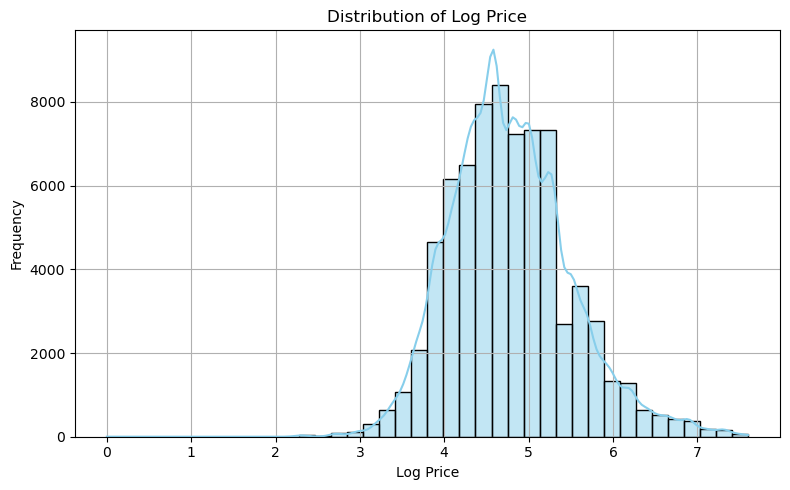

In [35]:
# Distribution of target variable 

plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Feature engineering on Amenities and Neighborhood

# count amenities
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.strip('{}').split(',')))

df= df.drop(["amenities"],axis=1)

# Group by neighbourhood and sum number_of_reviews
neighbourhood_review_counts = df.groupby('neighbourhood')['number_of_reviews'].sum()
df['neighbourhood_popularity'] = df['neighbourhood'].map(neighbourhood_review_counts)

df= df.drop(columns=['neighbourhood'])

In [36]:
# converting zipcode and cleaning fee to string(object) datatype
df["zipcode"] = df["zipcode"].astype(str)
df['cleaning_fee'] = df['cleaning_fee'].astype(str)

In [38]:
numeric_col =df.dtypes[df.dtypes!="object"].index
numeric_col

Index(['log_price', 'accommodates', 'bathrooms', 'host_response_rate',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_tenure', 'days_since_last_review',
       'amenities_count', 'neighbourhood_popularity'],
      dtype='object')

In [40]:
col_to_encode=df.dtypes[df.dtypes=="object"].index
col_to_encode                 

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable', 'zipcode'],
      dtype='object')

Data Preprocessing

In [45]:
# encoding binary categorical valriable
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# Apply LabelEncoder to each column separately

for col in col_to_encode:
    df[col] = le.fit_transform(df[col])  # Encode each column individually

df[col_to_encode] = df[col_to_encode].apply(lambda col: le.fit_transform(col))

In [47]:
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,days_since_last_review,amenities_count,neighbourhood_popularity
0,5.010635,0,0,3,1.0,4,2,1,4,1,...,-73.991617,2,100.0,105,1.0,1.0,4780,3205.0,9,1469
1,5.129899,0,0,7,1.0,4,2,1,4,1,...,-73.989040,6,93.0,19,3.0,3.0,2869,2773.0,15,34394
2,4.976734,0,0,5,1.0,4,1,1,4,1,...,-73.943756,10,92.0,26,1.0,3.0,3106,2782.0,19,28317
3,6.620073,17,0,4,1.0,4,0,1,5,1,...,-122.431619,0,0.0,650,2.0,2.0,3661,2925.0,15,3587
4,4.744932,0,0,2,1.0,4,1,1,2,1,...,-77.034596,4,40.0,210,0.0,1.0,3767,3017.0,12,5935


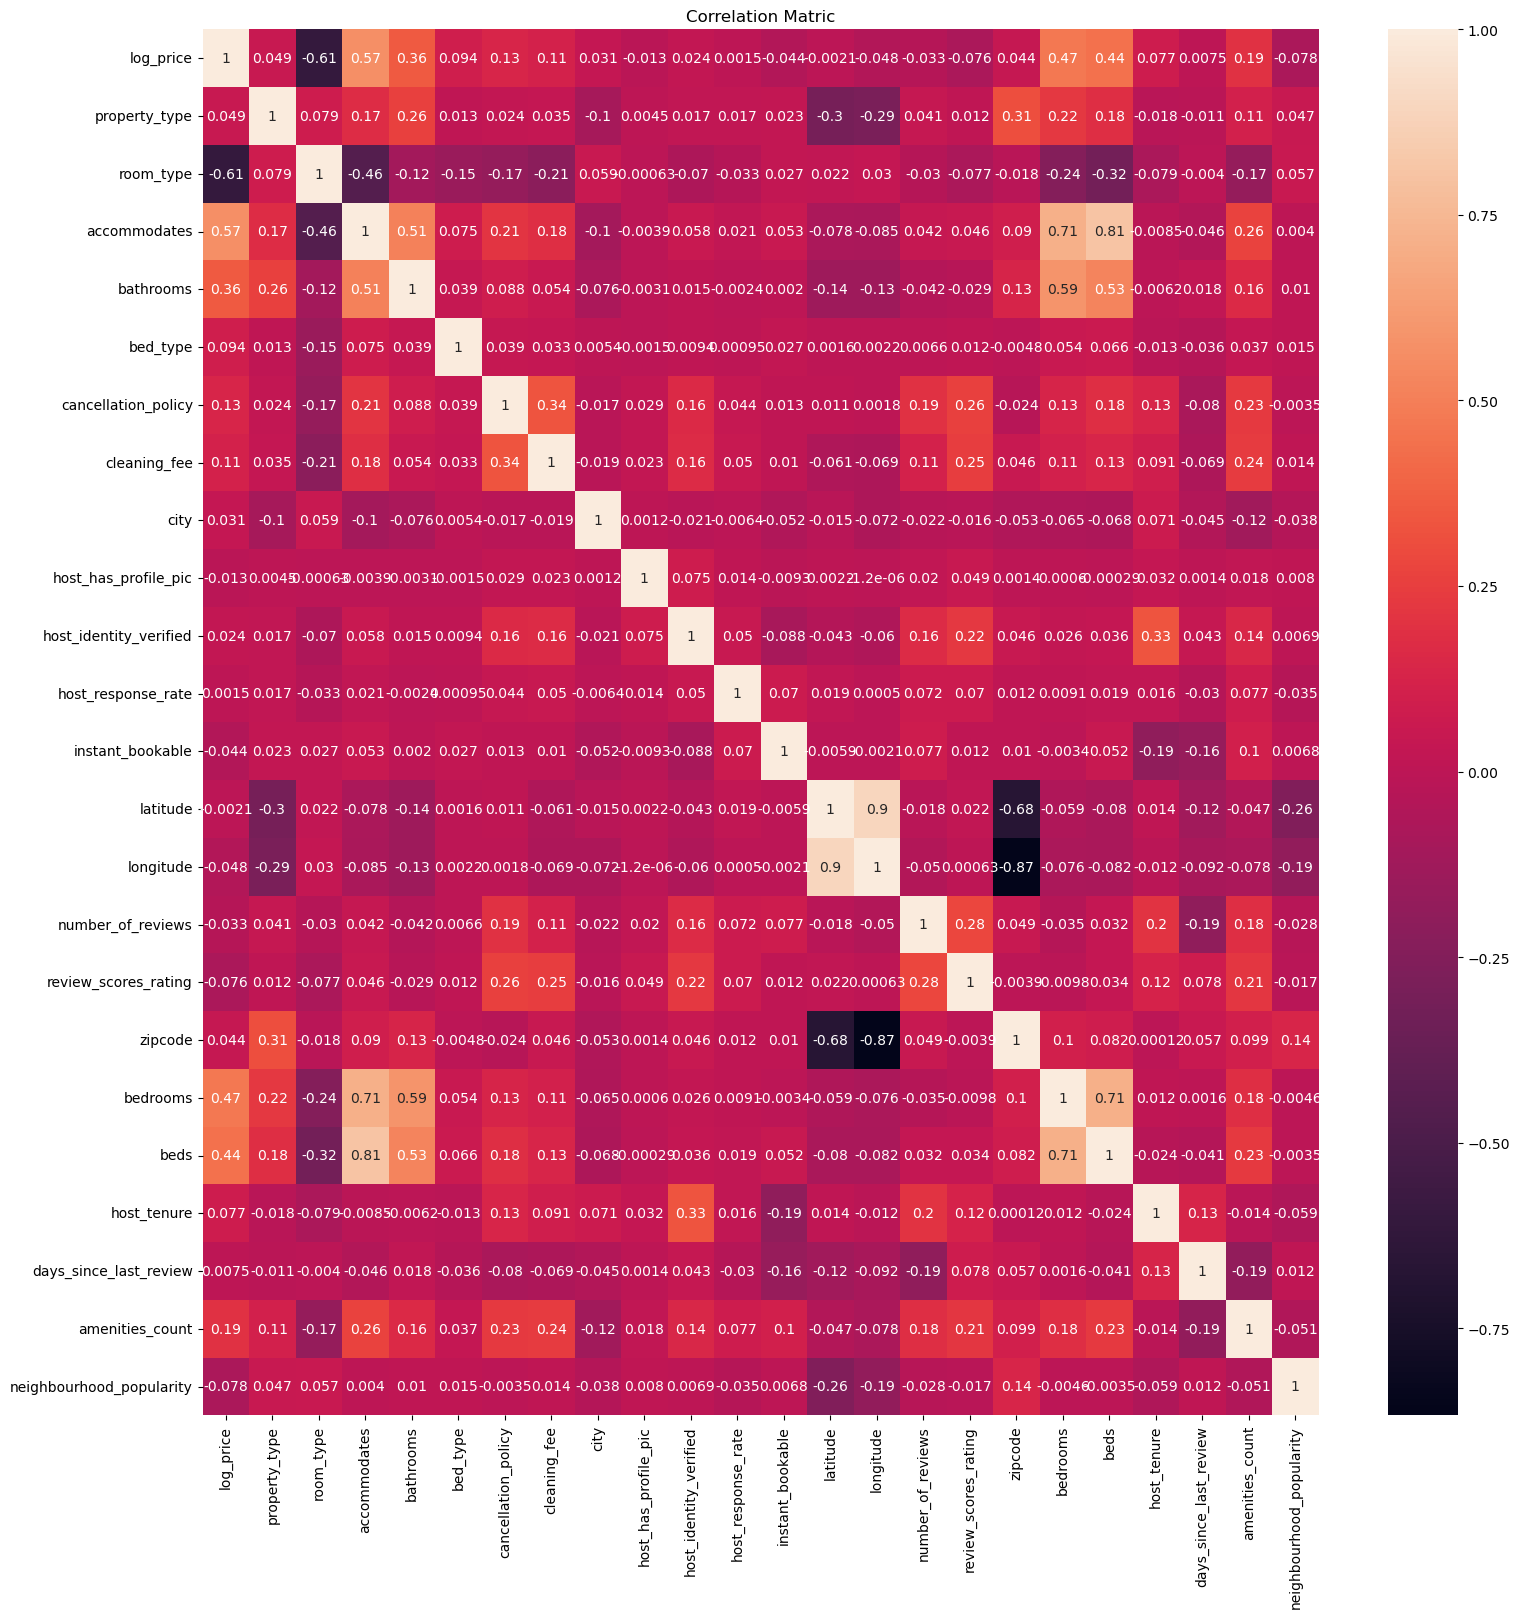

In [97]:
correlation_matrix = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot = True )
plt.title("Correlation Matric")
plt.show()

Key Finding 
* Room type shows a negative correlation(-0.61) with log_price
* Beds, bathrooms and accomodates shows a positive correation with log_price.
* Other features influences less with price column.

# Model Development

In [49]:
# defining independent variable x and dependent variable y
x=df.drop(['log_price'],axis=1)
y=df['log_price']

In [51]:
# split into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.2, random_state=42)

### Linear Regression

In [62]:
# Creating a Linear Regression Model and train
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
#Predict
y_pred_lr = lr.predict(x_test)

# Evaluation metrics

print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred_lr)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred_lr)}')
print(f'R^2 Score: {r2_score(y_test,y_pred_lr)}')

Mean Squared Error: 0.23523823648952455
Mean Absolute Error: 0.366065039138726
R^2 Score: 0.553509562946658


### Random forest

In [53]:

rl = RandomForestRegressor(n_estimators=200,criterion='squared_error',random_state=94)
rl.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=94)

In [55]:
#Predict
y_pred_rl = rl.predict(x_test)

# Evaluation metrics

print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred_rl)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred_rl)}')
print(f'R^2 Score: {r2_score(y_test,y_pred_rl)}')

Mean Squared Error: 0.1551418645041865
Mean Absolute Error: 0.28217864178470603
R^2 Score: 0.7055352908546854


### Support Vector Machine

In [62]:
# Standardizing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [61]:
svr = SVR(kernel='rbf',C=1.0,epsilon=0.1)
svr.fit(X_train_scaled,y_train)

SVR()

In [63]:
#Predict
y_pred_svm = svr.predict(X_test_scaled)

# Evaluation metrics

print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred_svm)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred_svm)}')
print(f'R^2 Score: {r2_score(y_test,y_pred_svm)}')

Mean Squared Error: 0.18194957981828352
Mean Absolute Error: 0.3130377324352061
R^2 Score: 0.6546533054019259


### Comparing evaluation results of models

In [57]:
print("Evaluation Results of different models:")
model= pd.DataFrame({"model":["Linear Regression","Random Forest","SVM"],
                     "mse":[0.23523823648952455,  0.1551418645041865,0.18194957981828352],
                     "mae":[0.366065039138726, 0.28217864178470603, 0.3130377324352061 ],
                     "r^2":[0.553509562946658,0.7055352908546854,  0.6546533054019259] })
model

Evaluation Results of different models:


,model,mse,mae,r^2
0,Linear Regression,0.235238,0.366065,0.553510
1,Random Forest,0.155142,0.282179,0.705535
2,SVM,0.181950,0.313038,0.654653


### Evaluation Result:
Model Accuracy: The Random Forest model explained 70% of the variance in listing prices (R^2 = 0.7055), making it a reliable predictor for this use case. Random Forest is choosen as final model because it  indicates that listing prices are influenced by non-linear interaction with the features.

Error Distribution: Low MAE of 0.283 indicates the model makes relatively small errors on average, providing confidence in price suggestions.

In [146]:
# Getting important features
importances = rf.feature_importances_
features = x_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
                                       'Feature': features,
                                       'Importance': importances
                                                                 }).sort_values(by='Importance', ascending=False)
 

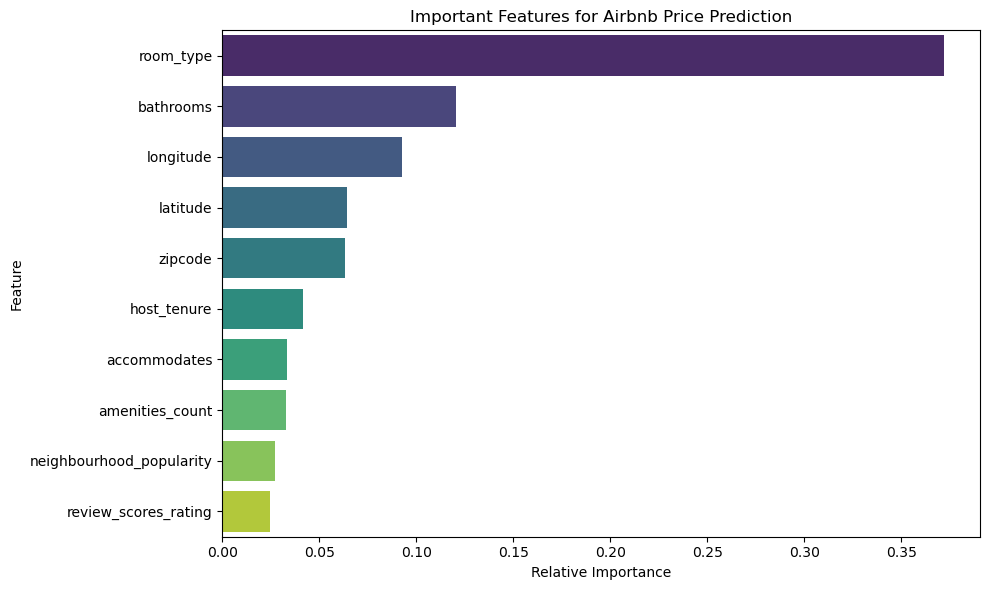

In [148]:
# Visualization of top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Important Features for Airbnb Price Prediction')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Insights and Key Findings:
* Room type shows the highest impact for predicting price.
* Bathroom has a significant influence leading to higher prices.
* Location feature like longitude, latitude and zipcode are also ranked high , making it good price listing by location popularity.
* Host tenure (calculated as the number of days since the host joined) show positively influenced price.
* Accomodates, aminities , neighborhood popularity and review scoring also showed clear and positive correlation with pricing and listing of house.

# Recommendations :
Focus on Room Type and Space, listings with entire homes or apartments provide significantly higher prices.

Bathrooms played a significant role in pricing and listing , so adding extra bathrooms or improving existing bathroom facilities can enhance and justify higher rates.

Guests are willing to pay more for comfort and convenience, so enhance amenities which increase the price prediction.

Host should highlight location attributes.

A good review score is a key driver of higher pricing, so focusing on giving great experience can leave a positive review.